<a href="https://colab.research.google.com/github/lokesh-alt/COVID-19_data_analysis/blob/master/new_cases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nose

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA
from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from pylab import rcParams
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns

In [ ]:
wd = pd.read_csv('/content/World  dataset.csv',index_col='location')
wd.head(5)

,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Asia,12/31/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
Afghanistan,AFG,Asia,1/1/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
Afghanistan,AFG,Asia,1/2/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
Afghanistan,AFG,Asia,1/3/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
Afghanistan,AFG,Asia,1/4/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
new_data = pd.DataFrame(wd.iloc[:,:7])
new_data.head(5)

,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths
location,,,,,,,
Afghanistan,AFG,Asia,12/31/2019,0.0,0.0,0.0,0.0
Afghanistan,AFG,Asia,1/1/2020,0.0,0.0,0.0,0.0
Afghanistan,AFG,Asia,1/2/2020,0.0,0.0,0.0,0.0
Afghanistan,AFG,Asia,1/3/2020,0.0,0.0,0.0,0.0
Afghanistan,AFG,Asia,1/4/2020,0.0,0.0,0.0,0.0


In [ ]:
new_data.drop(columns=['iso_code','continent'])
new_data.tail(10)

,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths
location,,,,,,,
International,NaN,NaN,2/23/2020,634.0,0.0,2.0,0.0
International,NaN,NaN,2/24/2020,691.0,57.0,3.0,1.0
International,NaN,NaN,2/25/2020,691.0,0.0,3.0,0.0
International,NaN,NaN,2/26/2020,691.0,0.0,4.0,1.0
International,NaN,NaN,2/27/2020,705.0,14.0,4.0,0.0
International,NaN,NaN,2/28/2020,705.0,0.0,4.0,0.0
International,NaN,NaN,2/29/2020,705.0,0.0,6.0,2.0
International,NaN,NaN,3/1/2020,705.0,0.0,6.0,0.0
International,NaN,NaN,3/2/2020,705.0,0.0,6.0,0.0


In [ ]:
new_data.drop(columns=['iso_code','continent',],inplace=True)
new_data.head(5)

,date,total_cases,new_cases,total_deaths,new_deaths
location,,,,,
Afghanistan,12/31/2019,0.0,0.0,0.0,0.0
Afghanistan,1/1/2020,0.0,0.0,0.0,0.0
Afghanistan,1/2/2020,0.0,0.0,0.0,0.0
Afghanistan,1/3/2020,0.0,0.0,0.0,0.0
Afghanistan,1/4/2020,0.0,0.0,0.0,0.0


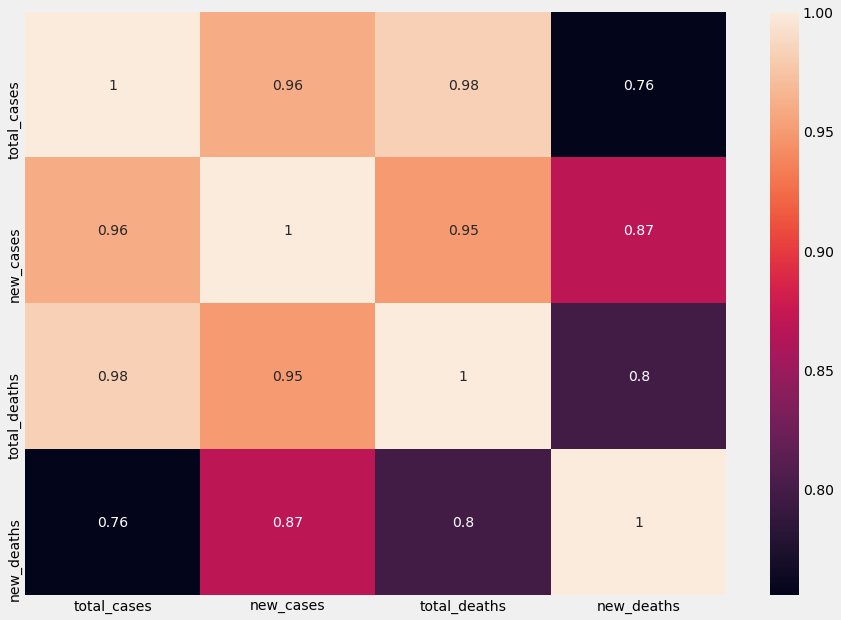

In [ ]:
plt.figure(figsize = (14, 10))
sns.heatmap(new_data.corr(), annot = True)

**Total Cases in India**

In [ ]:
data_india = new_data[new_data.index=='India']
data_india.head(5)

,date,total_cases,new_cases,total_deaths,new_deaths
location,,,,,
India,12/31/2019,0.0,0.0,0.0,0.0
India,1/1/2020,0.0,0.0,0.0,0.0
India,1/2/2020,0.0,0.0,0.0,0.0
India,1/3/2020,0.0,0.0,0.0,0.0
India,1/4/2020,0.0,0.0,0.0,0.0


In [ ]:
data_india.set_index('date',inplace=True)


In [ ]:
data_label = data_india['total_cases']
data_features = data_india.drop(columns=['total_cases','total_deaths','new_deaths'])

In [ ]:
min_max_scaler = MinMaxScaler()
data_india = min_max_scaler.fit_transform(data_features)

In [ ]:
data_features_train, data_features_test, data_label_train, data_label_test = train_test_split(
        data_features, data_label, train_size = 0.7, test_size = 0.3)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(data_features_train, data_label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear_model_predict = linear_model.predict(data_features_test)
print("Mean squared error: %.2f"
      % mean_squared_error(data_label_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(data_label_test, linear_model_predict))

Mean squared error: 665732999.70
Mean absolute error: 20045.32


In [ ]:
random_forest_model = RandomForestRegressor()
random_forest_fit = random_forest_model.fit(data_features_train, data_label_train)
random_forest_model_predict = random_forest_model.predict(data_features_test)

In [ ]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(data_features_train, data_label_train)
grid_cv.best_params_

result = grid_cv.cv_results_
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("Mean squared error: %.2f"
      % mean_squared_error(data_label_test, random_forest_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(data_label_test, random_forest_model_predict))

Best Parameters: {'min_samples_split': 3}
Mean squared error: 134076985.51
Mean absolute error: 6245.57


**ARIMA time series**

In [ ]:
data_series = data_india.drop(columns=['total_cases','total_deaths','new_deaths'])
data_series.tail(10)
data_series = data_series[data_series['new_cases']>0]
data_series.head(5)

,new_cases
date,
1/30/2020,1.0
2/2/2020,1.0
2/4/2020,1.0
3/3/2020,2.0
3/4/2020,1.0


In [ ]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

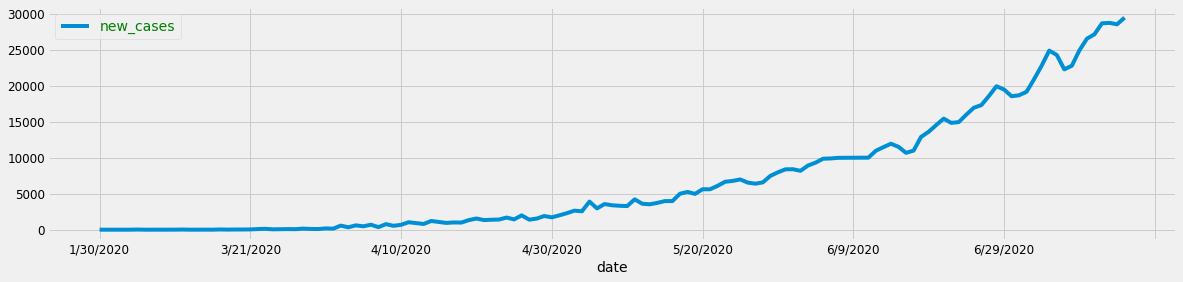

In [ ]:
data_series.plot(figsize=(18, 4),)
plt.show()

In [ ]:
mod = sm.tsa.statespace.SARIMAX(data_series,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6656      0.050     13.298      0.000       0.567       0.764
ar.S.L12       1.0000      0.088     11.351      0.000       0.827       1.173
ma.S.L12      -0.2073      0.034     -6.125      0.000      -0.274      -0.141
sigma2      2.273e+06   2.69e+05      8.448      0.000    1.75e+06     2.8e+06


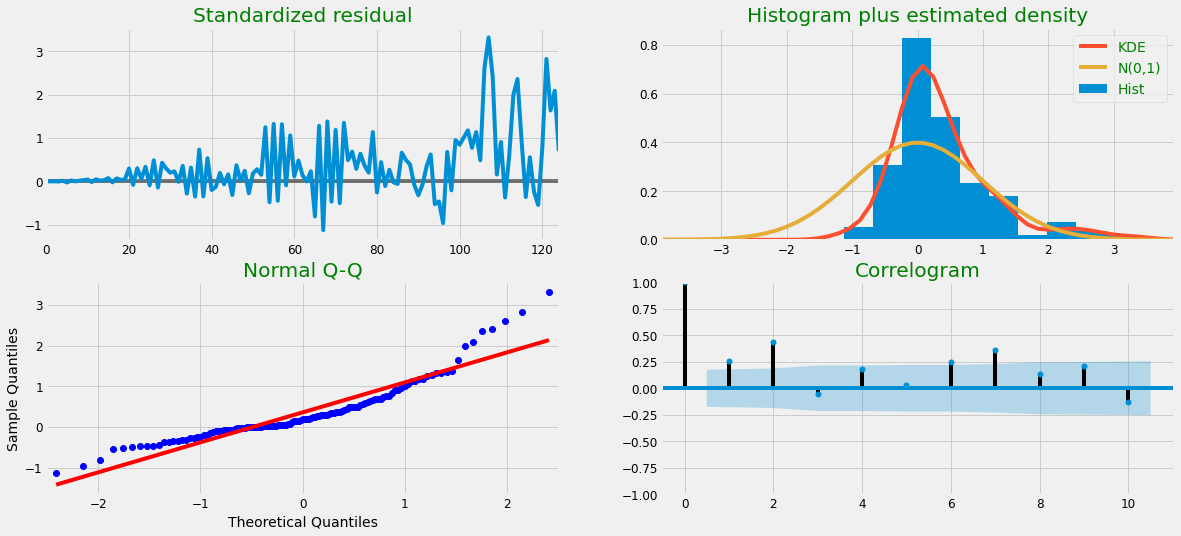

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

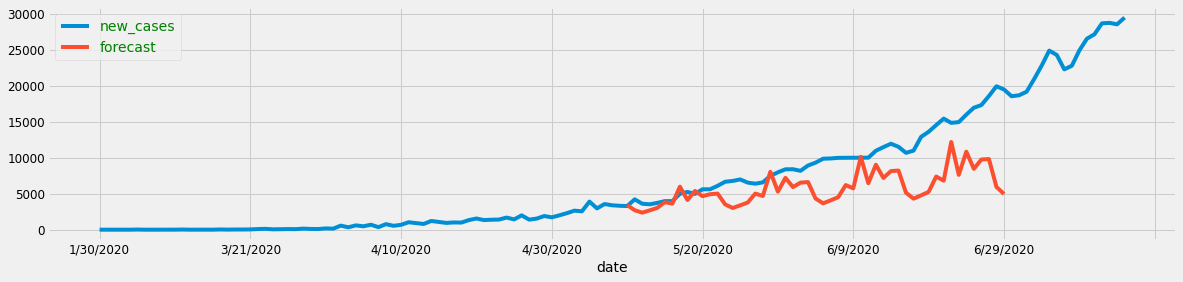

In [ ]:
data_series['forecast']=results.predict(start=70,end=120,dynamic=True)
data_series[['new_cases','forecast']].plot(figsize=(18, 4))

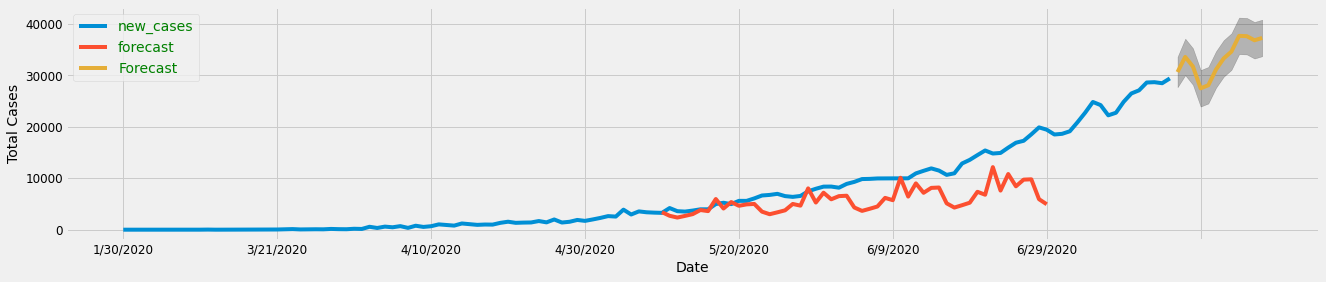

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = data_series.plot(label='observed', figsize=(20, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
plt.legend()
plt.show()

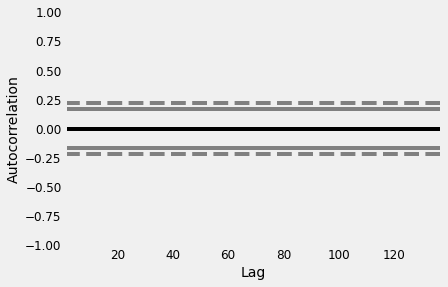

In [ ]:
pd.plotting.autocorrelation_plot(data_series)

                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                  136
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1052.976
Method:                       css-mle   S.D. of innovations            557.194
Date:                Sat, 01 Aug 2020   AIC                           2119.953
Time:                        14:25:59   BIC                           2140.341
Sample:                             1   HQIC                          2128.238
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               217.6182     46.388      4.691      0.000     126.699     308.537
ar.L1.D.new_cases     0.2676      0.087      3.093      0.002       0.098       0.437
ar.L2.D.new_cases    -0.

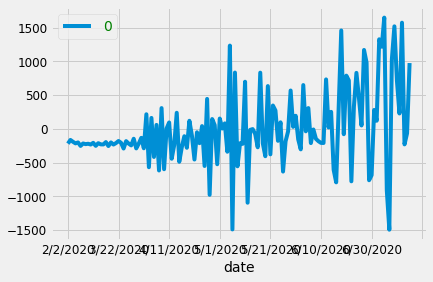

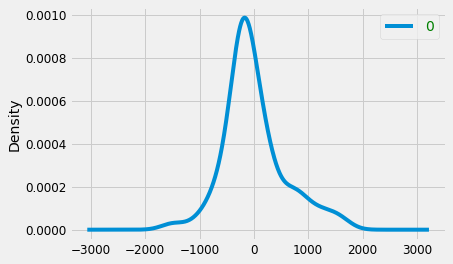

                 0
count   136.000000
mean     -0.930172
std     559.297174
min   -1493.326065
25%    -245.622549
50%    -169.688139
75%     220.231823
max    1649.657032


In [ ]:
model = ARIMA(data_series['new_cases'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

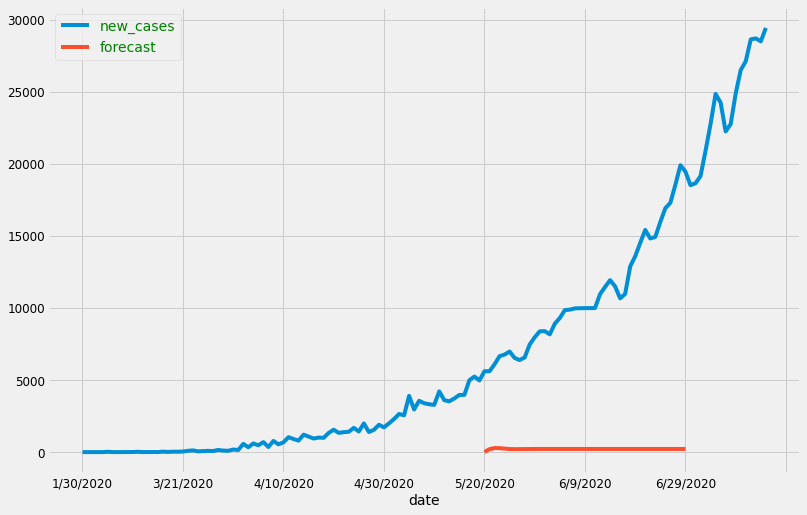

In [ ]:
data_series['forecast']=model_fit.predict(start=80,end=120,dynamic=True)
data_series[['new_cases','forecast']].plot(figsize=(12,8))

**SVM**

In [ ]:
clf = svm.SVC(kernel='linear') 
clf.fit(data_features_train, data_label_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(data_features_test)
print("Accuracy:",metrics.accuracy_score(data_label_test, y_pred))

131868.0
Accuracy: 0.11666666666666667
